<a href="https://colab.research.google.com/github/shawnmuhr/BIOL_398/blob/main/HW_Solutions/biol300_hw7_group_solns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import glob
import gdal
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.measure

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 
    'axes.labelsize': 12, 
    'axes.titlesize': 12}
sns.set(rc=rc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1 (30 points)

At the end of the individual portion, you should have had a list of all the image file names for the jellyfish during the day. 

A. Now loop through those images, extract out the box for the third jellyfish, and save the total intensity of the box at each frame.



In [ ]:
im_list = glob.glob("/*/*/*/*/data/jellyfish_day_10sec/*.TIF")
im_list.sort()
im_list[:10]

['/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545300.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545301.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545302.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545303.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545304.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545305.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545306.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545307.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545308.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545309.TIF']

In [ ]:
box_intensities = []

for im in im_list:
  im = gdal.Open(im).ReadAsArray()
  im_box = im[80:236,348:497]
  box_intensities.append(im_box.sum())

B. Plot these intensities over time. To set the x-axis you'll need to use the fact that there were 15 frames per second. How many pulses do you see during these 10 seconds?

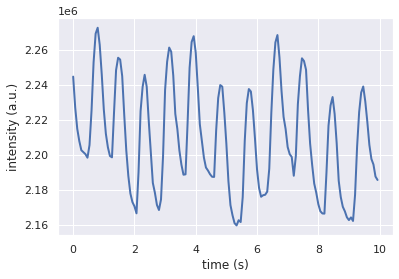

In [ ]:
# get x axis values, in steps of 1/15 seconds
x_vals = np.arange(len(im_list))*(1/15)

# plot and label
plt.plot(x_vals, box_intensities)
plt.xlabel("time (s)")
plt.ylabel("intensity (a.u.)");

**Seems like there are 11 to 12 pulses in this 10 second time frame.**

C. Repeat the analysis for this same jellyfish, but for the images taken at night. How many times does the jellyfish pulse at night?

In [ ]:
im_list = glob.glob("/*/*/*/*/data/jellyfish_night_10sec/*.TIF")
im_list.sort()
im_list[:10]

['/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545300.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545301.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545302.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545303.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545304.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545305.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545306.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545307.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545308.TIF',
 '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_night_10sec/Frame_545309.TIF']

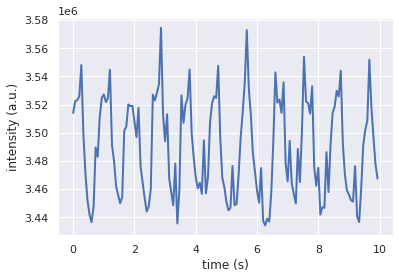

In [ ]:
box_intensities = []

for im in im_list:
  im = gdal.Open(im).ReadAsArray()
  im_box = im[80:236,348:497]
  box_intensities.append(im_box.sum())

# plot and label
plt.plot(x_vals, box_intensities)
plt.xlabel("time (s)")
plt.ylabel("intensity (a.u.)");

**There seems to be a comparable number of pulses, around 11.**

D. What differences do you notice in the jellyfish between night and day?

**While the number of pusles seems about the same, the images during the day seem to show smoother pulsing.**

It turns out that these single 10-second clips don't make the differences between the night and day particular clear. Now that you have a sense of how these data were analyzed, let's take a look at the values for a much longer time frame, without messing with the images themselves. Below is the dataframe of values for 250+ seconds of images (as analyzed by yours truly!).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BIOL300_S22/data/jellyfish_values.csv")
df.head()

,time (s),day,night
0,0.000000,4.073090,9.195357
1,0.066667,3.925700,9.073050
2,0.133333,3.785661,9.073950
3,0.200000,3.715860,9.099444
4,0.266667,3.666644,9.229641


E. Now plot these values for the jellyfish over time for day and night. Note: it's probably best to make two separate plots, as night and day have their own scales of values (due to the ambient lighting in the room), making them hard to compare on a single plot.

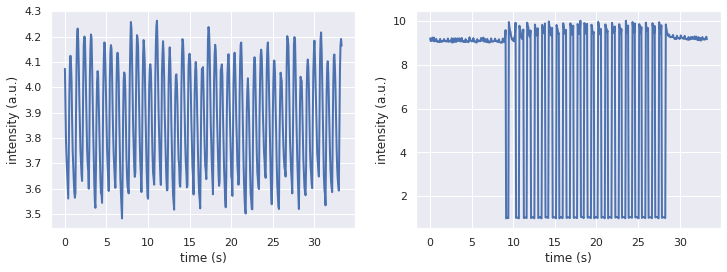

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(df['time (s)'], df["day"])
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("intensity (a.u.)")
ax[1].plot(df['time (s)'], df["night"])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("intensity (a.u.)");

Let's also look at a trimmed version of this data, to better see the pulsing.

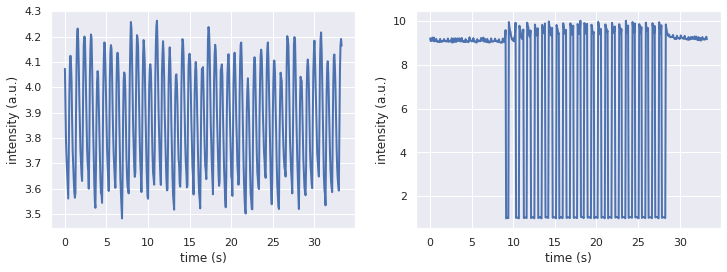

In [ ]:
df = df[:500]

fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(df['time (s)'], df["day"])
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("intensity (a.u.)")
ax[1].plot(df['time (s)'], df["night"])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("intensity (a.u.)");

F. Now looking over this longer time frame, what differences do you see between night and day? What do you think lead the author to conclude that jellyfish exhibit a "sleep-like state"?

**We see that the jellyfish during the day (shown on the left) pulses nearly non-stop. However that same jellyfish at night seems to alternate between times of pulsing and times of resting. It's hard to know if this is bona fide sleep, but it is certainly distinctly different from what is seen during the day.**

# Problem 2 (40 points)

This problem is a continuation of the second problem from the previous homework. It turns out the researchers actually tested a whole range of repressor copy numbers (not just delta and R124), as they had predictions of how the gene expression (as measured by YFP) changed with increasing number of repressors. Make sure to grab the full data set from the HW7 OneDrive folder, as we now have more images to work with.

In cases like this, where we want to repeat the same analysis on many images, it is helpful to put your entire image analysis pipeline into a function that can be called repeatedly.

A. Write a function that takes in the path to an mCherry image and corresponding YFP image, and returns a list of the YFP intensities of each bacteria in the images. This basically distills everything you did last homework into a single function.



In [ ]:
def average_YFP_values(mCherry_path, YFP_path):

  # load images
  im_mCherry = skimage.io.imread(mCherry_path)
  im_YFP = skimage.io.imread(YFP_path)

  # threshold mCherry image
  mCherry_thresh = (im_mCherry > 1500)

  # label bacteria in thresholded image
  labeled = skimage.measure.label(mCherry_thresh)

  YFP_vals = []

  # loop through the number of objects 
  # and get an averge YFP for each
  num_objs = labeled.max()
  for i in range(1, num_objs+1):
    obj_img = (labeled == i)
    overlay = obj_img * im_YFP
    avg_YFP = overlay.sum() / obj_img.sum()
    YFP_vals.append(avg_YFP)

  return YFP_vals

B. Demonstrate that your function works by testing it on the delta LacI strain we investigated last week. It should return the same results as you saw for question 2C last week. 

In [ ]:
path_mCherry = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_mCherry.tif"
path_YFP = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_YFP.tif"

average_YFP_values(path_mCherry, path_YFP)

[3850.4508196721313,
 3902.7770700636943,
 3875.6666666666665,
 4035.214611872146,
 4024.813492063492,
 4086.5855855855857,
 2850.0,
 4020.3430656934306,
 4030.603305785124,
 4054.7,
 3922.160714285714,
 3939.543046357616,
 4016.020134228188,
 3990.855614973262,
 3951.5529953917053,
 4023.5777777777776,
 3984.964912280702,
 3954.3373493975905]

C. With this, we are ready to apply your function to all the images. 
Use `glob.glob` to get all the mCherry images and YFP images, saving each as their own lists. Make sure to sort both lists so the correct images correspond with each other!

In [ ]:
mCherry_imgs = glob.glob("/content/drive/MyDrive/BIOL300_S22/data/lacI_images/*_mCherry.tif")
mCherry_imgs.sort()
YFP_imgs = glob.glob("/content/drive/MyDrive/BIOL300_S22/data/lacI_images/*_YFP.tif")
YFP_imgs.sort()

Below we can verify that the two lists are in the same order: R124, R22, R260, R60, and deltaLacI.

In [ ]:
mCherry_imgs

['/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R124_experiment_001_mCherry.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R22_experiment_001_mCherry.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R260_experiment_001_mCherry.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R60_experiment_001_mCherry.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_mCherry.tif']

In [ ]:
YFP_imgs

['/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R124_experiment_001_YFP.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R22_experiment_001_YFP.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R260_experiment_001_YFP.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R60_experiment_001_YFP.tif',
 '/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_YFP.tif']

D. Now call your function on each pair of mCherry/YFP images, saving each list of YFP values.

In [ ]:
# save numerical values for the repressor copy numbers, for plotting
Rs = [124, 22, 260, 60, 0]

# initilize dataframe for saving values
column_names = ["repressor copy number", "YFP"]
df = pd.DataFrame(columns = column_names)

# loop through the sets of images
for i in range(5):

  # get the corresponding R and YFP values for this set of images
  R = Rs[i]
  YFP_vals = average_YFP_values(mCherry_imgs[i], YFP_imgs[i])

  # loop through the YFP values, adding to the dataframe
  for val in YFP_vals:
    new_row = {"repressor copy number": R, "YFP": val} 
    df = df.append(new_row, ignore_index = True)

E. Consolidate your results either into a dataframe, or into two lists (one of x-values and one of y-values). With this, plot a scatter plot of YFP intensity vs. repressor copy number (where DeltaLacI is 0 repressors, R22 is 22 repressors, etc.). 

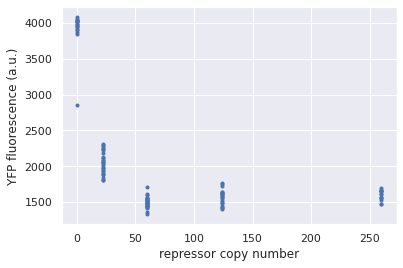

In [ ]:
plt.plot(df["repressor copy number"], df["YFP"], '.')
plt.xlabel("repressor copy number")
plt.ylabel("YFP fluorescence (a.u.)");

From this, we see the clear repression of YFP with increasing repressor numbers. 22 repressors show and intermediate level of YFP expression, while the three strains above 60 seem all comparably repressed.